<a href="https://colab.research.google.com/github/karthiklakkur1/Crop-weed-extension/blob/main/PEAPLANT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zunorain/pea-plant-dataset")

print("Path to dataset files:", path)

100%|██████████| 16.8M/16.8M [00:00<00:00, 172MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zunorain/pea-plant-dataset/versions/1


In [ ]:
from google.colab import drive
import shutil

# Source: your downloaded dataset path
src_path = "/root/.cache/kagglehub/datasets/zunorain/pea-plant-dataset/versions/1"

# Destination: your preferred Drive location
dst_path = "/content/drive/MyDrive/pea_plant_dataset"

# Copy entire directory
shutil.copytree(src_path, dst_path)

print(f"Dataset copied to: {dst_path}")


Dataset copied to: /content/drive/MyDrive/pea_plant_dataset


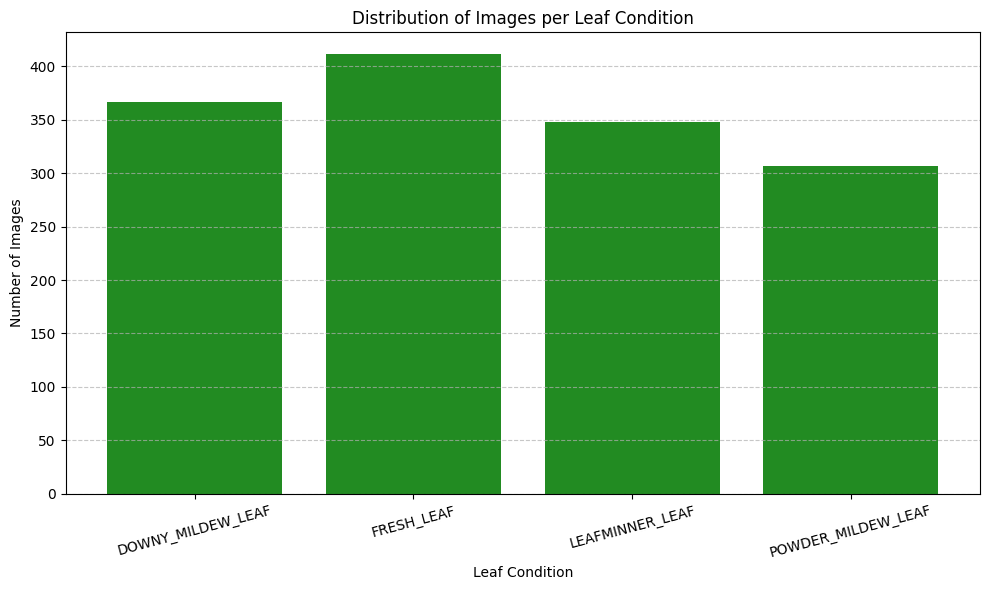

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to the dataset in Drive
dataset_path = "/content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset"

# List each folder and count the number of images inside
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        count = len([f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))])
        class_counts[class_name] = count

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='forestgreen')
plt.xlabel('Leaf Condition')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Leaf Condition')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [2]:
import os
import shutil
import random

# Base path to the dataset where class folders live
base_dir = "/content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset"

# Desired split ratios
split_ratios = {
    "train": 0.7,
    "test": 0.15,
    "val": 0.15
}

# For reproducibility
random.seed(42)

for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Get list of all image files
    all_images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    random.shuffle(all_images)

    # Calculate split indices
    total = len(all_images)
    train_end = int(split_ratios["train"] * total)
    test_end = train_end + int(split_ratios["test"] * total)

    split_data = {
        "train": all_images[:train_end],
        "test": all_images[train_end:test_end],
        "val": all_images[test_end:]
    }

    for split, files in split_data.items():
        split_folder = os.path.join(class_path, split)
        os.makedirs(split_folder, exist_ok=True)

        for file in files:
            src_file = os.path.join(class_path, file)
            dst_file = os.path.join(split_folder, file)
            shutil.move(src_file, dst_file)

print("✅ Dataset split completed successfully.")


✅ Dataset split completed successfully.


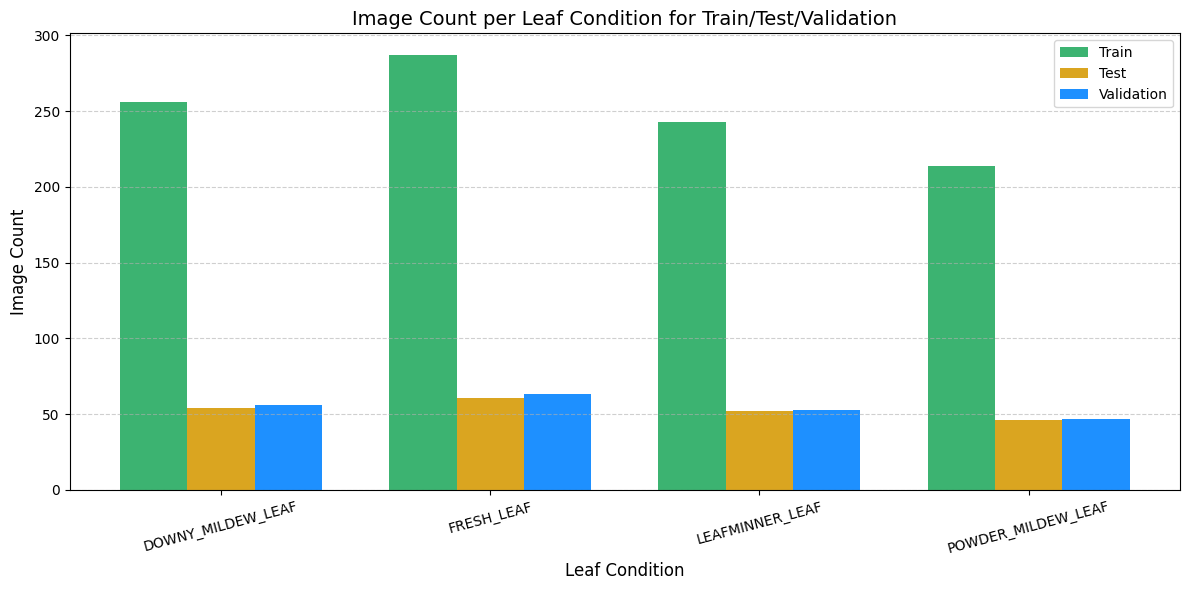

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Base path to the dataset
base_dir = "/content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset"

# Initialize data containers
leaf_conditions = []
train_counts, test_counts, val_counts = [], [], []

# Traverse class folders
for class_name in sorted(os.listdir(base_dir)):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    leaf_conditions.append(class_name)

    for split, container in zip(['train', 'test', 'val'], [train_counts, test_counts, val_counts]):
        split_path = os.path.join(class_path, split)
        if os.path.exists(split_path):
            count = len([
                f for f in os.listdir(split_path)
                if os.path.isfile(os.path.join(split_path, f))
            ])
        else:
            count = 0
        container.append(count)

# Plotting grouped bar chart
x = np.arange(len(leaf_conditions))
bar_width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, train_counts, width=bar_width, label='Train', color='mediumseagreen')
plt.bar(x, test_counts, width=bar_width, label='Test', color='goldenrod')
plt.bar(x + bar_width, val_counts, width=bar_width, label='Validation', color='dodgerblue')

plt.xlabel("Leaf Condition", fontsize=12)
plt.ylabel("Image Count", fontsize=12)
plt.title("Image Count per Leaf Condition for Train/Test/Validation", fontsize=14)
plt.xticks(x, leaf_conditions, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [5]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Define base path to dataset
base_dir = "/content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset"

# Initialize the data generator
augmentor = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop through each class and each split
for class_folder in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_folder)
    if not os.path.isdir(class_path):
        continue

    for split in ['train', 'test', 'val']:
        split_path = os.path.join(class_path, split)
        if not os.path.exists(split_path):
            continue

        image_files = [f for f in os.listdir(split_path) if os.path.isfile(os.path.join(split_path, f))]
        current_count = len(image_files)
        target_count = current_count * 3  # increase by 3x

        print(f"Augmenting {split_path}: {current_count} ➜ {target_count}")

        i = 0
        while len(os.listdir(split_path)) < target_count:
            img_name = image_files[i % current_count]
            img_path = os.path.join(split_path, img_name)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)

            # Generate one augmented image at a time
            for batch in augmentor.flow(x, batch_size=1, save_to_dir=split_path,
                                        save_prefix='aug', save_format='jpg'):
                break  # only one image per loop
            i += 1

print("✅ Augmentation completed: all subfolders tripled in size.")


Augmenting /content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset/LEAFMINNER_LEAF/train: 243 ➜ 729
Augmenting /content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset/LEAFMINNER_LEAF/test: 52 ➜ 156
Augmenting /content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset/LEAFMINNER_LEAF/val: 53 ➜ 159
Augmenting /content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset/DOWNY_MILDEW_LEAF/train: 256 ➜ 768
Augmenting /content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset/DOWNY_MILDEW_LEAF/test: 54 ➜ 162
Augmenting /content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset/DOWNY_MILDEW_LEAF/val: 56 ➜ 168
Augmenting /content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset/FRESH_LEAF/train: 287 ➜ 861
Augmenting /content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset/FRESH_LEAF/test: 61 ➜ 183
Augmenting /content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset/FRESH_LEAF/val: 63 ➜ 189
Augmenting /content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset/POWDER_MILDEW_LEAF/train: 2

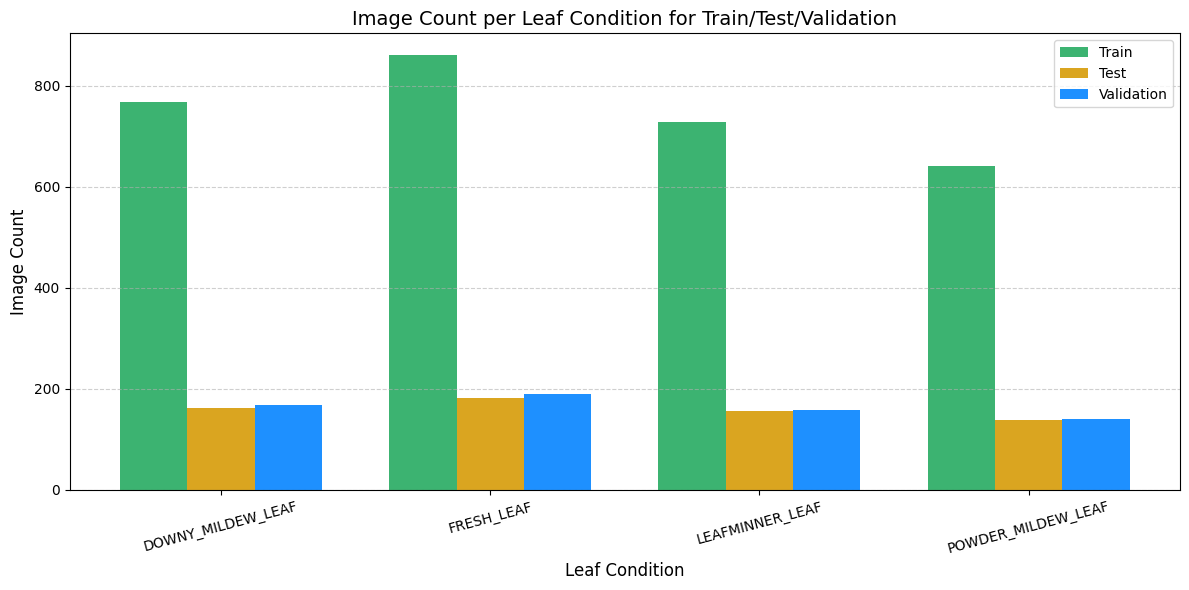

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Base path to the dataset
base_dir = "/content/drive/MyDrive/pea_plant_dataset/Pea Plant dataset"

# Initialize data containers
leaf_conditions = []
train_counts, test_counts, val_counts = [], [], []

# Traverse class folders
for class_name in sorted(os.listdir(base_dir)):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    leaf_conditions.append(class_name)

    for split, container in zip(['train', 'test', 'val'], [train_counts, test_counts, val_counts]):
        split_path = os.path.join(class_path, split)
        if os.path.exists(split_path):
            count = len([
                f for f in os.listdir(split_path)
                if os.path.isfile(os.path.join(split_path, f))
            ])
        else:
            count = 0
        container.append(count)

# Plotting grouped bar chart
x = np.arange(len(leaf_conditions))
bar_width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, train_counts, width=bar_width, label='Train', color='mediumseagreen')
plt.bar(x, test_counts, width=bar_width, label='Test', color='goldenrod')
plt.bar(x + bar_width, val_counts, width=bar_width, label='Validation', color='dodgerblue')

plt.xlabel("Leaf Condition", fontsize=12)
plt.ylabel("Image Count", fontsize=12)
plt.title("Image Count per Leaf Condition for Train/Test/Validation", fontsize=14)
plt.xticks(x, leaf_conditions, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

